In [0]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



data = np.array(np.arange(0, math.pi*2 + 0.1, 0.1))
data_test = np.array(np.arange(0.05, math.pi*2+0.1, 0.1))

x_data = np.transpose([data])
x_data_test = np.transpose([data_test])

# Sin
def sinFunc(x):
  return np.sin(2*x)

# Square
# 1 for [0, pi) and -1 for [pi, 2*pi].
def squareFunc(x):
  returnArr = np.zeros(len(x))
  for i in range(len(returnArr)):
    val = 0
    if(0<= x[i] and x[i]< math.pi):
      val = 1
    else:
      val = -1
    returnArr[i] = val
  return np.transpose([returnArr])
    

y_sinData = sinFunc(x_data)

y_squareData = squareFunc(x_data)


y_sinData_test = sinFunc(x_data_test)

y_squareData_test = squareFunc(x_data_test)




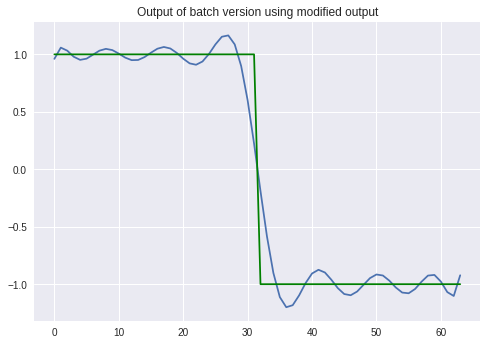

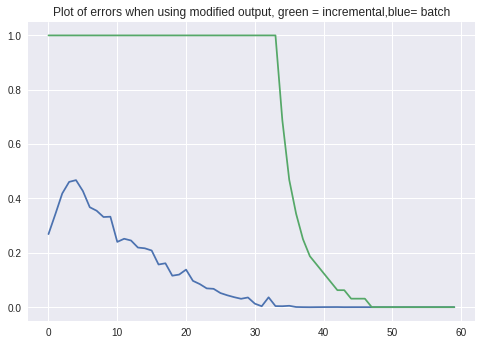

In [64]:
#testing variables

#batchSize = 3
N_RBFNodes = 60

# Change this to change data
rounded = True
dataUsed = x_data
targetUsed = y_squareData

nodesIn = np.shape(dataUsed)[1]
nodesOut = np.shape(targetUsed)[1]

nDataPoints = len(dataUsed)
nDataPoints_Range = range(nDataPoints)

batchErr = []
incrErr = []

for i in range(N_RBFNodes):

  RBFNodes = i + 1
  hidden = np.zeros((nDataPoints,RBFNodes))
  weights = np.zeros((nodesIn,RBFNodes))
  
  sigma = 0.9
  
  #print(sigma)
  steps = nDataPoints / RBFNodes

  mu = np.zeros(RBFNodes)

  for i in range(RBFNodes):
    index = 0
    avg = 0
    for j in range(steps):
      avg = dataUsed[j + i * steps]

    mu[i] = avg/steps
    avg = 0

  #Gauss
  for i in range(RBFNodes):
    hidden[:,i] = np.exp((-(np.transpose(dataUsed)-mu[i])**2)/(2*sigma**2)) 

  #LEAST SQUARES
  A = np.matmul(np.transpose(hidden),hidden)
  b = np.matmul(np.transpose(hidden),targetUsed)
  w = np.linalg.solve(A,b)
  #Checking error
  output1 = np.matmul(hidden,w)
  if (rounded):
    for i in range(len(output)):
      if (output[i] < 0):
        output[i] = -1
      else:
        output[i] = 1
  error = np.mean(output1-targetUsed)
  

  ###### DELTARULE INCREMENTAL LOOP THROUGH ROWS OF HIDDEN

  eta = 0.0001

  for k in range(nDataPoints):
    e =targetUsed[k]-np.matmul(hidden[k,:],np.transpose(weights))
    deltaW = eta*e*hidden[k,:]

    weights=weights+deltaW
    
    output = np.matmul(hidden,np.transpose(weights))
    if (rounded):
      for i in range(len(output)):
        if (output[i] < 0):
          output[i] = -1
        else:
          output[i] = 1
          
  error_incremental = np.mean(output-targetUsed)

  #print("RBFNodes: " + str(RBFNodes))
  #print("Error for batch learning least squares")
  #if(RBFNodes > 27 and  RBFNodes< 44):
  #print(RBFNodes)
  #print (error)
  #print(error_incremental)
  
  
  #print("Error for incremental delta rule")
  #print(error_incremental)
  batchErr.append(error)
  incrErr.append(error_incremental)
plt.figure(1)
plt.plot(output1)
plt.plot(targetUsed,'g')
plt.title('Output of batch version using modified output')
plt.show()

  
plt.figure(2)
plt.plot(batchErr)  
plt.plot(incrErr) 
plt.title('Plot of errors when using modified output, green = incremental,blue= batch')
plt.show()

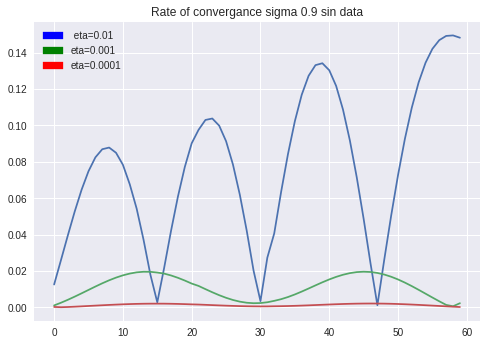

In [25]:
incrErr1 = []
incrErr2 = []
incrErr3 = []

for i in range(N_RBFNodes):

  RBFNodes = i + 1
  hidden1 = np.zeros((nDataPoints,RBFNodes))
  weights1 = np.zeros((nodesIn,RBFNodes))
  
  hidden2 = np.zeros((nDataPoints,RBFNodes))
  weights2 = np.zeros((nodesIn,RBFNodes))
  
  hidden3 = np.zeros((nDataPoints,RBFNodes))
  weights3 = np.zeros((nodesIn,RBFNodes))
  
  sigma = 0.9
  
  #print(sigma)
  steps = nDataPoints / RBFNodes

  mu = np.zeros(RBFNodes)

  for i in range(RBFNodes):
    index = 0
    avg = 0
    for j in range(steps):
      avg = dataUsed[j + i * steps]

    mu[i] = avg/steps
    avg = 0

  #Gauss
  for i in range(RBFNodes):
    hidden1[:,i] = np.exp((-(np.transpose(dataUsed)-mu[i])**2)/(2*sigma**2)) 
    hidden2[:,i] = np.exp((-(np.transpose(dataUsed)-mu[i])**2)/(2*sigma**2)) 
    hidden3[:,i] = np.exp((-(np.transpose(dataUsed)-mu[i])**2)/(2*sigma**2)) 

  
  eta1 = 0.01
  eta2 = 0.001
  eta3 = 0.0001
  
  for k in range(nDataPoints):
    e1 =(targetUsed[k]-np.matmul(hidden1[k,:],np.transpose(weights1)))
    deltaW1 = eta1*e1*hidden1[k,:]
    weights1=weights1+deltaW1
    
    e2 =(targetUsed[k]-np.matmul(hidden2[k,:],np.transpose(weights2)))
    deltaW2 = eta2*e2*hidden2[k,:]
    weights2=weights2+deltaW2
    
    e3 =(targetUsed[k]-np.matmul(hidden3[k,:],np.transpose(weights3)))
    deltaW3 = eta3*e3*hidden3[k,:]
    weights3=weights3+deltaW3

  error_incremental1 = np.sqrt(np.mean((np.matmul(hidden1,np.transpose(weights1))-targetUsed))**2)
  error_incremental2 = np.sqrt(np.mean((np.matmul(hidden2,np.transpose(weights2))-targetUsed))**2)
  error_incremental3 = np.sqrt(np.mean((np.matmul(hidden3,np.transpose(weights3))-targetUsed))**2)


  incrErr1.append(error_incremental1)
  incrErr2.append(error_incremental2)
  incrErr3.append(error_incremental3)

plt.title('Rate of convergance sigma 0.9 sin data')  
plt.plot(incrErr1)  
plt.plot(incrErr2)  
plt.plot(incrErr3)  
blue = mpatches.Patch(color='blue', label=' eta=0.01')
green = mpatches.Patch(color='green', label='eta=0.001')
red = mpatches.Patch(color='red', label='eta=0.0001')
plt.legend(handles=[ blue, green, red])

plt.show()